In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import backgroung
import cmocean
from functools import reduce
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


In [4]:
path_o = '/Users/vrx/Downloads/gcoos_for_dissolved_oxygen_1996-01-01T00_00_00Z_to_2013-12-01T23_59_59Z_from_All_data_source_qc_passed.csv'
path_s = '/Users/vrx/Downloads/gcoos_for_salinity_1996-01-01T00_00_00Z_to_2013-12-01T23_59_59Z_from_All_data_source_qc_passed.csv'
path_t = '/Users/vrx/Downloads/gcoos_for_water_temperature_1996-01-01T00_00_00Z_to_2013-12-01T23_59_59Z_from_All_data_source_qc_passed.csv'
ds_o = pd.read_csv(path_o)
ds_o = ds_o.rename(columns={'verticalDatum': 'verticalDatum (m)'}) ;
ds_s = pd.read_csv(path_s)
ds_t = pd.read_csv(path_t)

In [5]:
comb = [ds_o, ds_s, ds_t]
commons = ['owner', 'platform', 'lat', 'lon', 'observationDate', 'verticalDatum (m)']
full = reduce(lambda left,right: pd.merge(left,right,on=commons), comb)
# full = pd.merge( ds, ds_s, on= ['owner', 'platform', 'lat', 'lon', 'observationDate', 'verticalDatum'])
full = full.replace(-999, np.nan)
print(full.size)
full = full.dropna()
full.size

12


0

In [124]:
ds_t.keys()

Index(['owner', 'platform', 'lat', 'lon', 'observationDate',
       'verticalDatum (m)', 'water_temperature (C)', 'qcFlag'],
      dtype='object')

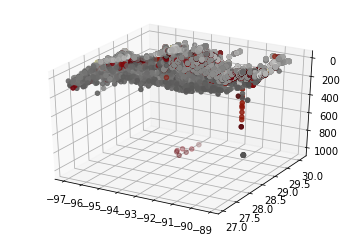

In [104]:
ds = ds_o.replace(-999, np.nan)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ds.lon, ds.lat,ds.verticalDatum, c=ds.dissolvedOxygen, cmap=cmocean.cm.oxy )
# ax.set_zlim3d(0, 50)
ax.invert_zaxis()

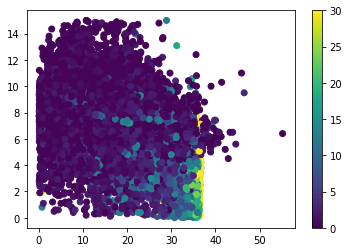

In [105]:
plt.scatter(full['salinity (PSU)'], full['dissolvedOxygen'], c=full['verticalDatum'], vmin=0, vmax=30)
plt.colorbar()

In [117]:
bott = full.loc[full.groupby(by=['owner', 'platform', 'lat', 'lon', 'observationDate'])['verticalDatum'].idxmax()]
bott = bott.rename(columns={'verticalDatum': 'surface'})

In [118]:
surf = full.loc[full.groupby(by=['owner', 'platform', 'lat', 'lon', 'observationDate'])['verticalDatum'].idxmin()]
surf = surf.rename(columns={'verticalDatum': 'bottom'})

In [119]:
combined = pd.merge(surf, bott, on= ['owner', 'platform', 'lat', 'lon', 'observationDate'])
combined

,owner,platform,lat,lon,observationDate,bottom,dissolvedOxygen_x,qcFlag_x_x,salinity (PSU)_x,qcFlag_y_x,surface,dissolvedOxygen_y,qcFlag_x_y,salinity (PSU)_y,qcFlag_y_y
0,Houston-Galveston Area Council,2421A-16563,29.5483,-95.0192,1999-01-11T14:10:00Z,0.3,10.000,1.0,9.00,1.0,0.30,10.000,1.0,9.00,1.0
1,Houston-Galveston Area Council,2421A-16563,29.5483,-95.0192,1999-02-03T14:30:00Z,0.3,8.000,1.0,14.00,1.0,0.30,8.000,1.0,14.00,1.0
2,Houston-Galveston Area Council,2421A-16563,29.5483,-95.0192,1999-03-19T14:12:00Z,0.3,8.000,1.0,14.00,1.0,0.30,8.000,1.0,14.00,1.0
3,Houston-Galveston Area Council,2421A-16563,29.5483,-95.0192,1999-04-19T14:32:00Z,0.3,8.000,1.0,10.00,1.0,0.30,8.000,1.0,10.00,1.0
4,Houston-Galveston Area Council,2421A-16563,29.5483,-95.0192,1999-05-17T14:15:00Z,0.3,6.000,1.0,7.00,1.0,0.30,6.000,1.0,7.00,1.0
5,Houston-Galveston Area Council,2421A-16563,29.5483,-95.0192,1999-07-09T13:55:00Z,0.3,5.000,1.0,8.00,1.0,0.30,5.000,1.0,8.00,1.0
6,Houston-Galveston Area Council,2421A-16563,29.5483,-95.0192,1999-07-19T14:21:00Z,0.3,5.000,1.0,8.00,1.0,0.30,5.000,1.0,8.00,1.0
7,Houston-Galveston Area Council,2421A-16563,29.5483,-95.0192,1999-08-23T14:30:00Z,0.3,6.000,1.0,15.00,1.0,0.30,6.000,1.0,15.00,1.0
8,Houston-Galveston Area Council,2421A-16563,29.5483,-95.0192,1999-09-20T14:15:00Z,0.3,6.000,1.0,21.00,1.0,0.30,6.000,1.0,21.00,1.0
9,Houston-Galveston Area Council,2421A-16563,29.5483,-95.0192,1999-10-18T14:15:00Z,0.3,6.000,1.0,22.00,1.0,0.30,6.000,1.0,22.00,1.0


In [120]:
combined.loc[(combined.surface <1.) & (combined.bottom >5.)]

,owner,platform,lat,lon,observationDate,bottom,dissolvedOxygen_x,qcFlag_x_x,salinity (PSU)_x,qcFlag_y_x,surface,dissolvedOxygen_y,qcFlag_x_y,salinity (PSU)_y,qcFlag_y_y


Text(0,0.5,'Bottom DO')

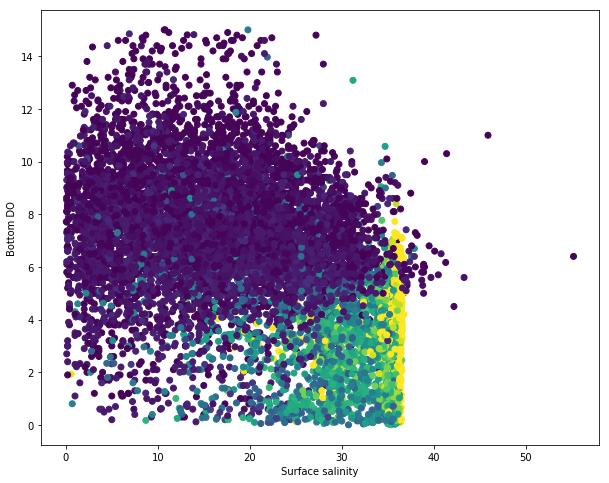

In [96]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(surf['salinity (PSU)'],bott['dissolvedOxygen'], c=bott['verticalDatum'], vmin=0, vmax=30)
ax.set_xlabel('Surface salinity')
ax.set_ylabel('Bottom DO')
ax.

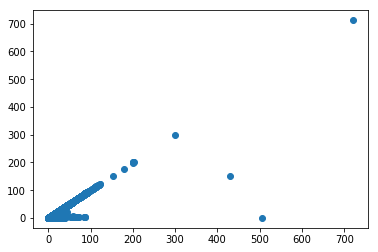

In [121]:
plt.scatter(combined.surface, combined.bottom)

In [91]:
full.size

240520

In [92]:
surf.size

104270

In [56]:
df.loc[df.groupby("item")["diff"].idxmin()]

In [57]:
full[]

,owner,platform,lat,lon,observationDate,verticalDatum,dissolvedOxygen,qcFlag_x,salinity (PSU),qcFlag_y
0,Texas Commission on Environmental Quality,2422-13315,29.6650,-94.7867,1996-01-10T14:32:00Z,0.30000,12.84,1.0,11.7,1.0
1,Texas Commission on Environmental Quality,2421-13306,29.6106,-94.9206,1996-01-10T14:40:00Z,0.30000,14.13,1.0,15.6,1.0
2,Texas Commission on Environmental Quality,2421-13306,29.6106,-94.9206,1996-01-10T14:40:00Z,1.52000,12.86,1.0,16.7,1.0
3,Texas Commission on Environmental Quality,2421-13306,29.6106,-94.9206,1996-01-10T14:40:00Z,3.35000,11.18,1.0,19.3,1.0
4,Texas Commission on Environmental Quality,2422-13315,29.6650,-94.7867,1996-01-10T15:32:00Z,1.83000,12.29,1.0,13.3,1.0
5,Texas Commission on Environmental Quality,2422-13315,29.6650,-94.7867,1996-01-10T15:32:00Z,3.35366,13.11,1.0,14.0,1.0
6,Texas Commission on Environmental Quality,2422-13315,29.6650,-94.7867,1996-01-10T15:32:00Z,0.30000,12.84,1.0,11.7,1.0
7,Texas Commission on Environmental Quality,2422-13314,29.6994,-94.7358,1996-01-10T15:55:00Z,1.22000,13.50,1.0,11.4,1.0
8,Texas Commission on Environmental Quality,2422-13314,29.6994,-94.7358,1996-01-10T15:55:00Z,0.30000,13.41,1.0,4.5,1.0
9,Texas Commission on Environmental Quality,2422-13314,29.6994,-94.7358,1996-01-10T15:55:00Z,2.13000,14.40,1.0,12.8,1.0


In [58]:
full.keys()

Index(['owner', 'platform', 'lat', 'lon', 'observationDate', 'verticalDatum',
       'dissolvedOxygen', 'qcFlag_x', 'salinity (PSU)', 'qcFlag_y'],
      dtype='object')